In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [90]:
data = pd.read_csv('clean_data.csv')
data.head()

,Unnamed: 0,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,0,0,1,0,1,1,-3,61,90,0
1,1,0,0,1,0,0,0,0,0,0,1,1,2,51,90,0
2,2,1,0,0,0,0,0,1,0,0,0,1,1,62,90,0
3,3,0,0,1,0,0,0,0,0,1,1,0,4,69,7,0
4,4,1,0,1,0,0,0,0,1,1,0,1,2,49,30,1


In [91]:
data.shape

(1453, 16)

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 16 columns):
Unnamed: 0        1453 non-null int64
yummy             1453 non-null int64
convenient        1453 non-null int64
spicy             1453 non-null int64
fattening         1453 non-null int64
greasy            1453 non-null int64
fast              1453 non-null int64
cheap             1453 non-null int64
tasty             1453 non-null int64
expensive         1453 non-null int64
healthy           1453 non-null int64
disgusting        1453 non-null int64
Like              1453 non-null int64
Age               1453 non-null int64
VisitFrequency    1453 non-null int64
Gender            1453 non-null int64
dtypes: int64(16)
memory usage: 181.7 KB


In [94]:
data.drop(columns=['Unnamed: 0','Age','VisitFrequency','Gender'],inplace=True)
y = data.Like
x = data.drop(columns='Like')

In [95]:
from sklearn.mixture import GaussianMixture

In [96]:
gmm = GaussianMixture(n_components = 2, n_init=10, random_state=40, init_params='random')
gmm.fit(x)
labels = gmm.predict(x)
x['labels']= labels

In [97]:
x.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,labels
0,1,0,1,0,1,0,0,1,0,1,1,1
1,0,0,1,0,0,0,0,0,0,1,1,1
2,1,0,0,0,0,0,1,0,0,0,1,1
3,0,0,1,0,0,0,0,0,1,1,0,1
4,1,0,1,0,0,0,0,1,1,0,1,1


In [98]:
x.labels.value_counts()

1    1061
0     392
Name: labels, dtype: int64

In [99]:
gmm.bic(x.iloc[:,0:-1])

-23635.962353188886

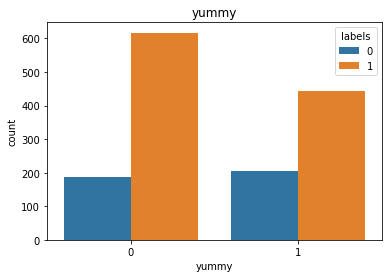

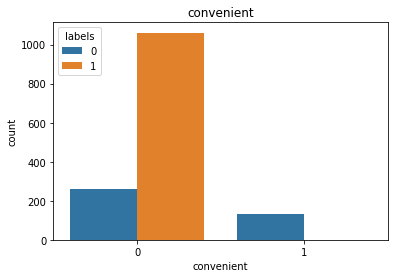

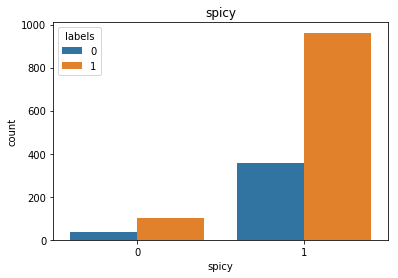

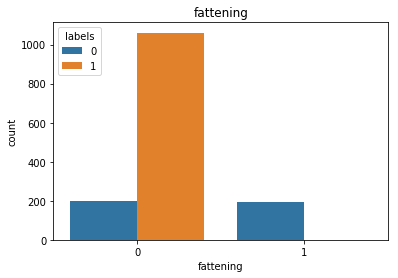

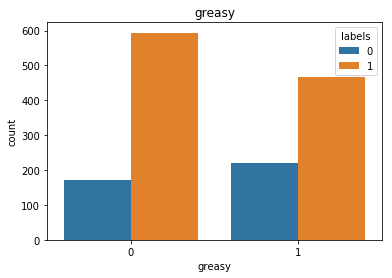

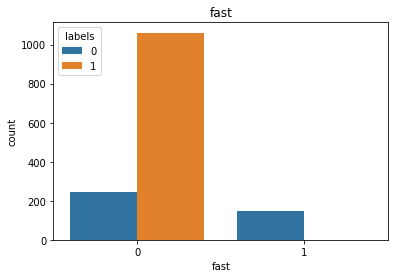

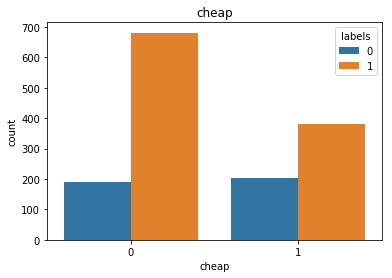

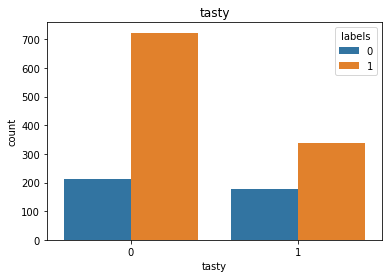

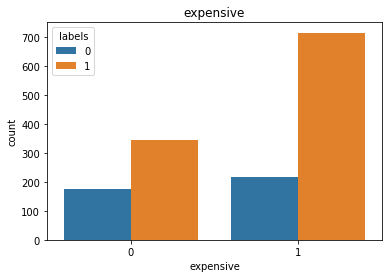

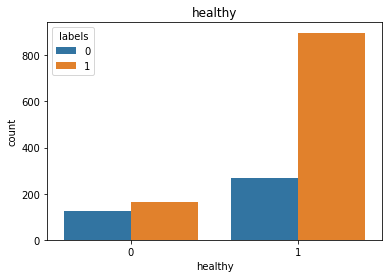

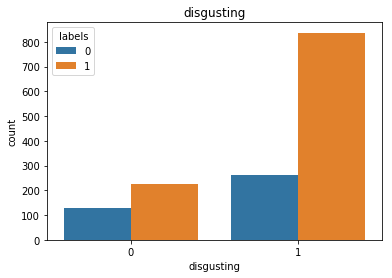

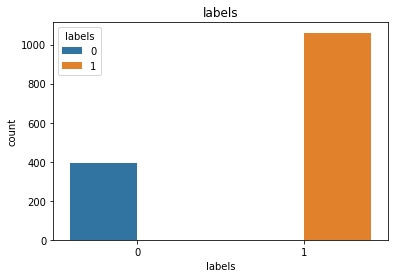

In [101]:
for col in x.columns:
    sns.countplot(x=x[col],hue=x.labels)
    plt.title(col)
    plt.show()

Variables for segment 1: 
Yummy-Yes, 
Convenient-Yes, 
Spicy-Yes, 
Fattening-Yes, 
Greasy-Yes, 
Fast-Yes, 
Cheap-Yes, 
Tasty-Yes,
Expensive-Yes,
Healthy-Yes,
Disgusting-Yes

Variables for segment 2:
Yummy-Yes,
Convenient-No,
Spicy-Yes,
Fattening-No,
Greasy-Yes,
Fast-No,
Cheap-Yes,
Tasty-Yes,
Expensive-Yes,
Healthy-Yes,
Disgusting-Yes